# Chapter 3 Problems - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))

## Load Libraries

In [2]:
library(readxl)
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)
library(AICcmodavg)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 3.1

In [3]:
dataTableB1 <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B1.XLS')

In [19]:
df <- data.frame(dataTableB1$y, dataTableB1$x2, dataTableB1$x7, dataTableB1$x8)

In [20]:
df <- df %>%
    rename(
        OppRush = dataTableB1.x8,
        PassYRDs = dataTableB1.x2,
        PercRushPlays = dataTableB1.x7,
        GamesWon = dataTableB1.y
    )

In [21]:
head(df)

,GamesWon,PassYRDs,PercRushPlays,OppRush
,<dbl>,<dbl>,<dbl>,<dbl>
1,10,1985,59.7,2205
2,11,2855,55.0,2096
3,11,1737,65.6,1847
4,13,2905,61.4,1903
5,10,1666,66.1,1457
6,11,2927,61.0,1848


In [22]:
summary(df)

    GamesWon         PassYRDs    PercRushPlays      OppRush    
 Min.   : 0.000   Min.   :1414   Min.   :43.80   Min.   :1457  
 1st Qu.: 4.000   1st Qu.:1714   1st Qu.:54.77   1st Qu.:1848  
 Median : 6.500   Median :2106   Median :58.65   Median :2050  
 Mean   : 6.964   Mean   :2127   Mean   :58.16   Mean   :2110  
 3rd Qu.:10.000   3rd Qu.:2474   3rd Qu.:61.10   3rd Qu.:2320  
 Max.   :13.000   Max.   :2929   Max.   :67.50   Max.   :2876  

In [23]:
linearMod <- lm(GamesWon ~ PassYRDs + PercRushPlays + OppRush, data=df)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = GamesWon ~ PassYRDs + PercRushPlays + OppRush, data = df)

Coefficients:
  (Intercept)       PassYRDs  PercRushPlays        OppRush  
    -1.808372       0.003598       0.193960      -0.004815  



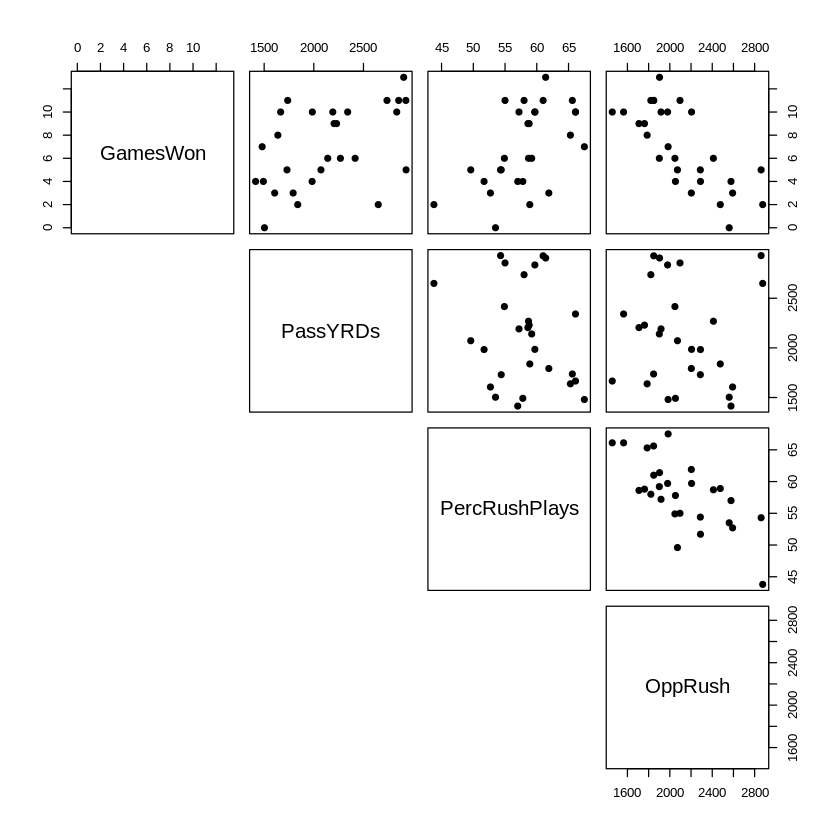

In [25]:
pairs(df[,1:4], pch=19, lower.panel = NULL)

In [26]:
summary(linearMod)


Call:
lm(formula = GamesWon ~ PassYRDs + PercRushPlays + OppRush, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.808372   7.900859  -0.229 0.820899    
PassYRDs       0.003598   0.000695   5.177 2.66e-05 ***
PercRushPlays  0.193960   0.088233   2.198 0.037815 *  
OppRush       -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


In [27]:
one.way <- aov(GamesWon ~ PassYRDs + PercRushPlays + OppRush, data = df)
summary(one.way)

              Df Sum Sq Mean Sq F value   Pr(>F)    
PassYRDs       1  76.19   76.19   26.17  3.1e-05 ***
PercRushPlays  1 139.50  139.50   47.92  3.7e-07 ***
OppRush        1  41.40   41.40   14.22 0.000938 ***
Residuals     24  69.87    2.91                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
 confint(linearMod, level=0.95)

,2.5 %,97.5 %
(Intercept),-18.114944410,14.498200293
PassYRDs,0.002163664,0.005032477
PercRushPlays,0.011855322,0.376065098
OppRush,-0.007451027,-0.002179961


In [29]:
pred<-predict(linearMod, data.frame(PassYRDs = c(2000)), interval="predict", level=0.95)
print(pred)

ERROR: Error in eval(predvars, data, env): object 'PassYRDs' not found


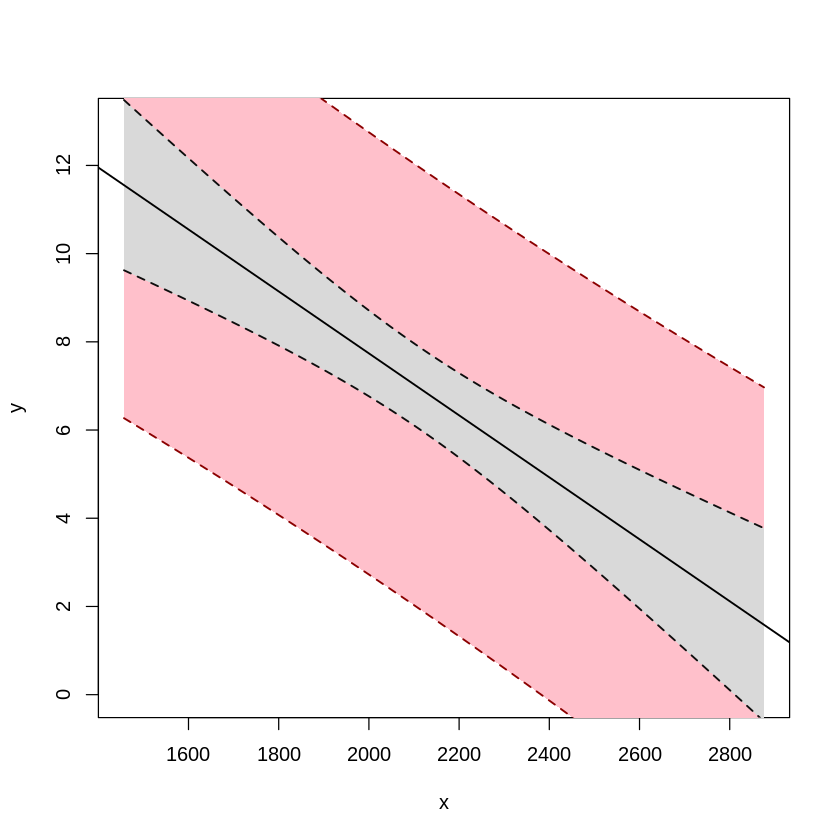

In [116]:
#get predicted y values using regression equation
newx <- seq(min(df$x), max(df$x), length.out=100)

#calculate the confidence interval values
conf <- predict(linearMod, newdata = data.frame(x=newx), interval = 'confidence', level=0.95)

#calculate the prediction interval values
pred <- predict(linearMod, newdata = data.frame(x=newx), interval = 'predict', level=0.95)

#create plot of x vs. y, but don't display individual points (type='n') 
plot(y ~ x, data = df, type='n')

#add polygon: Confidence Interval Upper -> Prediction Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), pred[ ,3]), col = 'pink', border = NA)

#add polygon: Predicted Values -> Confidence Interval Upper
polygon(c(rev(newx), newx), c(rev(conf[ ,3]), conf[ ,1]), col = 'gray85', border = NA)

#add polygon: Predicted Values -> Confidence Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), pred[ ,2]), col = 'pink', border = NA)

#add polygon: Confidence Interval Lower -> Prediction Interval Lower
polygon(c(rev(newx), newx), c(rev(conf[ ,2]), conf[ ,1]), col = 'gray85', border = NA)

#add line: Regression
abline(linearMod, lwd=1.5)

#add line: Confidence Interval Upper
lines(newx, conf[ ,3], lty = 'dashed', col = 'gray5', lwd=1.5)
#add line: Confidence Interval Lower
lines(newx, conf[ ,2], lty = 'dashed', col = 'gray5', lwd=1.5)

#add line: Prediction Interval Upper
lines(newx, pred[ ,3], lty = 'dashed', col = 'red4', lwd=1.5)
#add line: Prediction Interval Upper
lines(newx, pred[ ,2], lty = 'dashed', col = 'red4', lwd=1.5)



## 2.2